# <font color = "red">[READ THIS] Before you start</font>
Welcome to UpLevel DIY projects! In this series, you're challenged to independently work (with our guidance) with data that you will collect to UpLevel yourself. 

We hope you're excited to embark on this adventure.
### Warning:
This isn't just any coding course or programmes, where you receive helper code as you move from one code block to another. 

This is when things get <em>real</em>.

In this project, you will receive instructions to execute a task along with an intended outcome. Most importantly, we will provide you with directions you can go to, to pick up code independently and implement it in this notebook.

Don't worry though, we'll be dropping lots of resources you can consult and these readings will contain everything you need to succeed. You can also perform independent research to find answers independently. You just have to read closely and pick out the parts that make most sense. 

<strong>We make you do this not because we're lazy bastards but because being able to indepedently find code is a highly underrated skill and that's something all companies look out for.</strong>

If you're really stuck and are on the verge of giving up, we gotchu fam. Head on over to https://bit.ly/UpLevelSG and post your questions there. 

### What we'll be doing:
In this project, we will do the following:

<ol><li>Retrieve the data on food orders from a restaurant</li><li>Combine different datasets together</li><li>Perform exploratory data analysis on the combined dataset</li><li>Engineer new features from existing ones</li><li>Train a machine learning regression model to predict the number of food orders</li></ol>

### Expectations:
We're not going to sugarcoat it - it'll be challenging at times. You have to promise to put in the time and effort to UpLevel yourself. 

But we promise you that it'll ultimately be fun and rewarding, and you'll come out of it stronger and more confident than before.

<div style="background-color: #78E8A3; padding: 20px">
<h3>Project Scenario</h3>
<p>You are an employee in a company that does food delivery.</p><p>Running a delivery service is challenging due to logistics management and figuring out how much demand and supply at any point in time. In addition, the food in the fulfilment centers can't be stored too long so it's important to figure out the demand is at any time.</p><p>Being a fledging student in data science, you were interested in building a model to predict orders in advance so that you can prepare your deliverers without worrying about under- or over-taxing them.</p><p>In this project, you will use historical data from the delivery service to build a machine learning model to predict orders for the different fulfilment centers.</p> 
</div>

### Step 1: Import pandas
We'll have to use the pandas library in this Part so let's import it first.

In [1]:
# Step 1: Import pandas
import pandas as pd

### Step 2: Download the data and unzip
We're using the meal delivery company data from UCI Machine Learning Depository. More details can be found on the <a href="https://archive.ics.uci.edu/ml/datasets/Demand+Forecasting+for+a+store">site</a>.

However, the repository data is missing so download everything from <a href="https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectFoodRetail/data.zip">here</a> instead.

Once you are done with downloading the data, unzip the data in the same folder as the project folder.

You have three CSVs:
1. data.csv - the main CSV file containing the restaurant's orders
2. meal_info.csv - a CSV file containing what the meal_id means in data.csv
3. fulfilment_center_info - a CSV file containing information about the fulfilment centers that help delivery food orders

### Step 3: Load each CSV into a DataFrame
Now that you've download and unzipped the files into your folder, let's load it onto a DataFrame using pandas.

In [4]:
# Step 3a: Read data.csv into a DataFrame
main_raw_df = pd.read_csv('data.csv')
main_raw_df.head(3)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189


In [5]:
# Step 3a: Read meal_info.csv into a DataFrame
meal_info_df = pd.read_csv('meal_info.csv')
meal_info_df.head(3)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai


In [6]:
# Step 3c: Read fulfilment_center_info.csv into a DataFrame
ful_ctr_df = pd.read_csv('fulfilment_center_info.csv')
ful_ctr_df.head(3)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0


### Step 4: Count the number of missing data in the DataFrames
After loading the CSVs into DataFrames, it's important to know whether we have missing data or not. 

Find out if the columns in each DataFrame contain any missing data.

<details>
    <summary><font color = 'green'>Click once for hint</font></summary>
    <div>
        <strong>Google "count missing values in pandas"</strong>
    </div>
</details>

In [7]:
# Step 4a: Check for missing rows in each column for the DataFrame for data.csv
main_raw_df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [8]:
# Step 4b: Check for missing rows in each column for the DataFrame for meal_info.csv
meal_info_df.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

In [9]:
# Step 4c: Check for missing rows in each column for the DataFrame for fulfilment_center_info.csv
ful_ctr_df.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

### Step 5: Merge the main DataFrame with the center DataFrame
First, combine the data DataFrame and center DataFrame. 

Merge them on 'center_id' since that's the only column that the two have in common.

Your eventual DataFrame should have:
- 456,548 rows
- 13 columns

<details>
    <summary><font color = 'green'>Click once for hint</font></summary>
    <div>
        <strong>Google "merge two dataframes pandas on column"</strong>
    </div>
</details>

In [12]:
# Step 5: Merge main DataFrame and center DataFrame
df1 = main_raw_df.merge(ful_ctr_df,on='center_id')
len(df1)

456548

### Step 6: Merge the combined DataFrame with meal DataFrame
We'll combine the DataFrame we got from Step 5 with the meal DataFrame to get our final combined DataFrame.

This time, we'll use 'meal_id' as the common column to use for the merge.

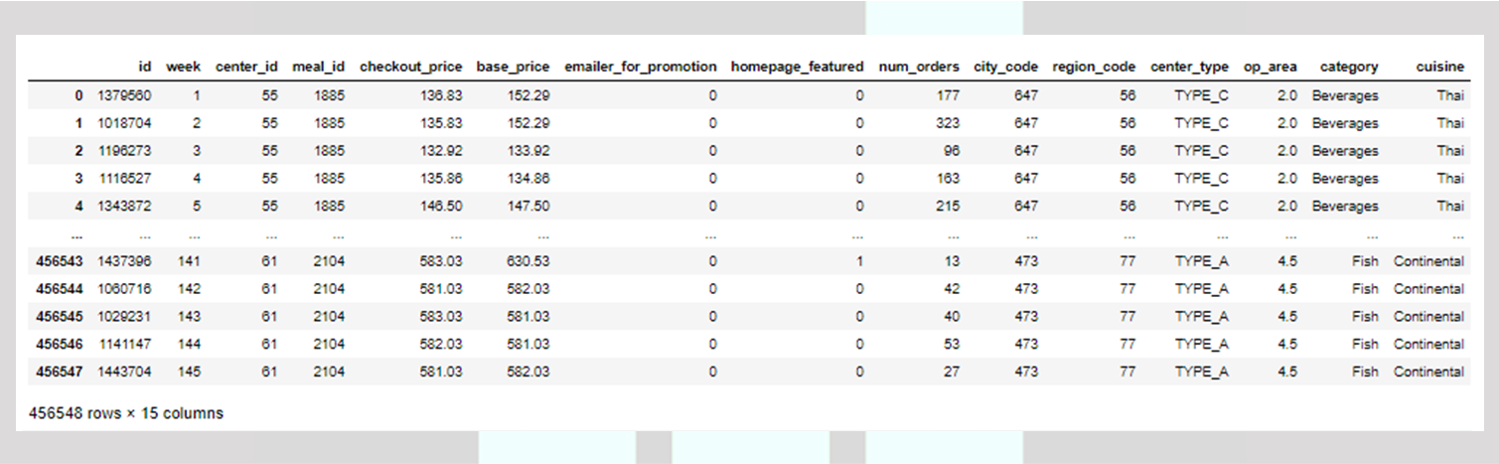

You'll have two new columns, at a final count of 15 columns.

In [14]:
# Step 6: Merge Step 5 DataFrame with meal DataFrame
full_raw_df = df1.merge(meal_info_df, on='meal_id')
full_raw_df.head(3)
len(full_raw_df)

456548

### Step 7: Check for missing values
Before we export the DataFrame as CSV, don't forget to check for missing values.

In [15]:
# Step 7: Check for missing values in the combined DataFrame
full_raw_df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

### Step 8: Export the combined DataFrame as CSV
Now that we're done combining the DataFrames, let's export it a CSV for use in subsequent Parts.

In [19]:
# Step 8: Export the DataFrame as CSV
full_raw_df.to_csv('merged_data.csv',index=False)

### End of Part I
If all goes well, we should not expect any missing rows in any of the data, but it's very important to check.

We are done with Part I for now. In this Part, we downloaded and examined the data for any missing pieces. We then combined the pieces and exported them as a single CSV.

Next up, we'll start asking questions and explore the data with visualizations.